This is a trace-driven simulator for HPC-Applicatoin Co-design

In [38]:
import numpy
import pandas
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython import display
%matplotlib inline

In [39]:
class Machine(object):
    def __init__(self, name):
        self.name = name
        self.bw_h2d = 12*1024**3
        self.bw_d2h = 12*1024**3
        self.bw_net = 100*1024**3/8     

    def info(self):
        print(self.name)
        print(self.bw_h2d)
        print(self.bw_d2h)
        print(self.bw_net)
        print('')    

In [40]:
class Application(object):
    def __init__(self, name):
        self.name = name
        self.weights = 100*1024**2
        self.flops = 1*1024**3
        self.t_fw = 0.03
        self.t_bw = 0.06
        self.t_cpu = 0.01
        self.t_comm = 0
        self.t_pcie = 0 
        self.t_net = 0

    def info(self):
        print(self.name)
        print(self.weights)
        print(self.flops)
        print('')    

In [41]:
machine = Machine('starwars')
app = Application('resnet50')

app.t_pcie = app.weights/machine.bw_d2h + app.weights/machine.bw_d2h
app.t_net = 2*app.weights/machine.bw_net
app.t_comm = app.t_pcie + app.t_net
machine.info()

starwars
12884901888
12884901888
13421772800.0



In [42]:
# sample data
df1 = pd.DataFrame(np.random.randn(8, 3))
df2 = pd.DataFrame(np.random.randn(8, 3))

# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()

# render in output widgets
with widget1:
    display.display(df1)
with widget2:
    display.display(df2)

# create HBox
hbox = widgets.VBox([widget1, widget2])

# render hbox
#hbox

,0,1,2
0,-0.313986,0.650830,-0.973397
1,-0.122933,0.863233,1.303605
2,1.033538,-0.242055,-0.237170
3,1.504011,-3.392660,-0.109389
4,2.087090,2.651631,-0.235421
5,0.367488,-0.065280,0.381872
6,0.422893,-0.152419,1.456548
7,-1.137740,-0.277758,0.372482


,0,1,2
0,-2.236064,1.053882,2.242917
1,-0.368634,0.248600,-0.788412
2,0.880419,-0.058374,1.499123
3,-0.882660,-0.547144,-0.225818
4,0.565736,1.302275,0.225919
5,-1.000201,-0.704068,-0.049689
6,0.817737,1.333973,-0.991746
7,0.481600,-0.770948,1.406275


<Figure size 432x288 with 0 Axes>

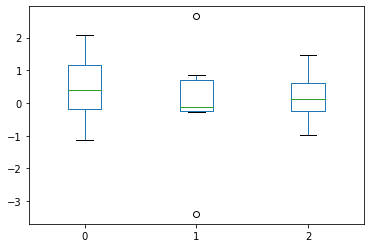

In [43]:
fig = plt.figure()
df1.plot.box()
